## 对解卷积集成的浸润比例结果画图

In [12]:
normal_results <- read.csv('/home/shiyu/data/BRCA/deconv/normal_ensemble.txt',row.names=2)
tumor_results <- read.csv('/home/shiyu/data/BRCA/deconv/tumor_ensemble.txt',row.names=2)

head(normal_results,2)
dim(normal_results)

head(tumor_results,2)
dim(tumor_results)

,X,B_cell_ensemble,T_cell_CD4_ensemble,T_cell_CD8_ensemble,Neutrophils_ensemble,Macrophage_ensemble
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,1,0.06906615,0.0861180,0.14382494,0.04634232,0.2044922
TCGA.E2.A1IG.11A.22R.A144.07,2,0.05696585,0.0987988,0.09690256,0.06380285,0.1233271


[1] 113   6

,X,B_cell_ensemble,T_cell_CD4_ensemble,T_cell_CD8_ensemble,Neutrophils_ensemble,Macrophage_ensemble
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,1,0.03899931,0.1348265,0.1453863,0.06793329,0.1416678
TCGA.AR.A0U0.01A.11R.A109.07,2,0.01754524,0.1276705,0.1357057,0.09776720,0.1508407


[1] 1106    6

In [16]:
normal_results <- normal_results[,-1]
tumor_results <- tumor_results[,-1]

In [6]:
#调包日常
pkgs <- c("matrixStats", "pheatmap", "RColorBrewer", "tidyverse", "cowplot","ggpubr","bslib","ggthemes")
lapply(pkgs, library, character.only = T)

[[1]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[2]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[3]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[4]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[5]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[6]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[7]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"        

[[8]]
 [1] "ggthemes"     "bslib"        "ggpubr"       "cowplot"      "forcats"     
 [6] "stringr"      "dplyr"        "purrr"        "readr"        "tidyr"       
[11] "tibble"       "ggplot2"      "tidyverse"    "RColorBrewer" "pheatmap"    
[16] "matrixStats"  "stats"        "graphics"     "grDevices"    "utils"       
[21] "datasets"     "methods"      "base"

### 对normal画图

In [82]:
head(normal_results,2)
dim(normal_results)

,B_cell,T_cell_CD4,T_cell_CD8,Neutrophils,Macrophage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.06906615,0.0861180,0.14382494,0.04634232,0.2044922
TCGA.E2.A1IG.11A.22R.A144.07,0.05696585,0.0987988,0.09690256,0.06380285,0.1233271


[1] 113   5

In [81]:
colnames(normal_results)=c('B_cell','T_cell_CD4','T_cell_CD8','Neutrophils','Macrophage')
colnames(tumor_results)=c('B_cell','T_cell_CD4','T_cell_CD8','Neutrophils','Macrophage')

In [83]:
library(dplyr)
library(tidyr)
dd1 <- normal_results %>%
  as.data.frame() %>%
  pivot_longer(cols = 1:5,
               names_to = "CellType",
               values_to = "Composition")

plot.info <- dd1[,c(1,2)]

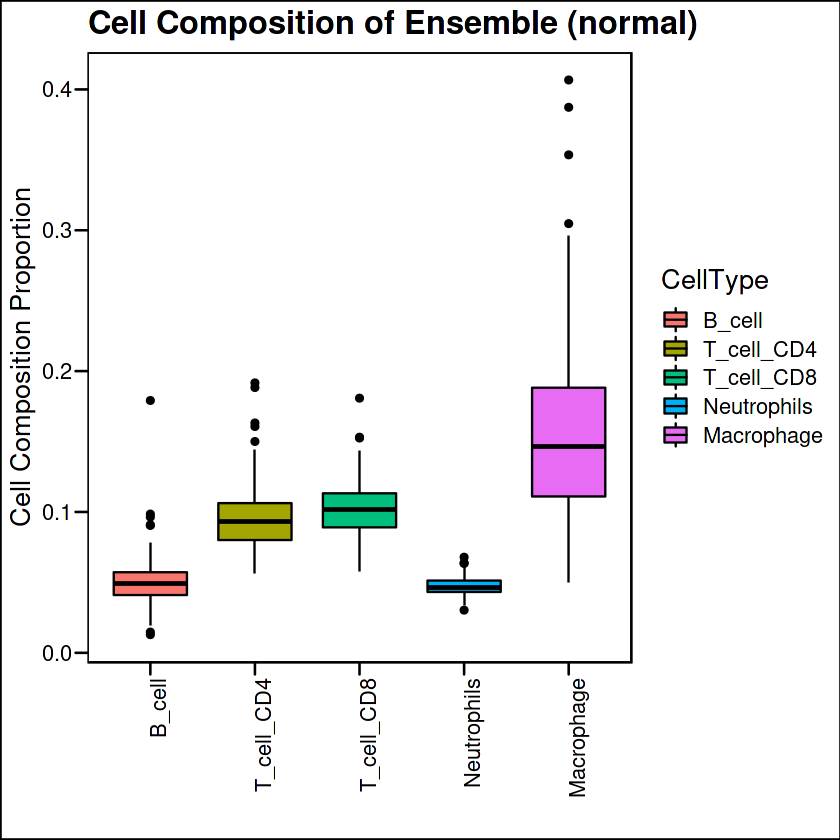

In [90]:
ggboxplot(
  plot.info,
  x = "CellType",
  y = "Composition",
  color = "black",
  fill = "CellType",
  xlab = "",
  ylab = "Cell Composition Proportion",
  main = "Cell Composition of Ensemble (normal)") +
  theme_base() +
  theme(axis.text.x = element_text(
    angle = 90,
    hjust = 1,
    vjust = 1
  ))     

### 对tumor画图

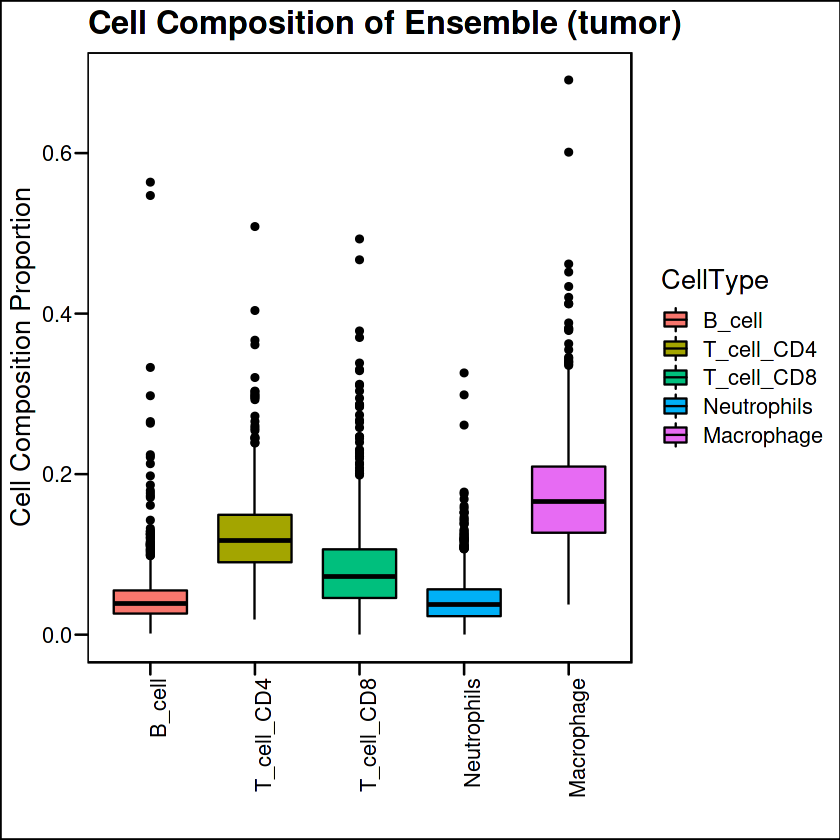

In [92]:
library(dplyr)
library(tidyr)
dd1 <- tumor_results %>%
  as.data.frame() %>%
  pivot_longer(cols = 1:5,
               names_to = "CellType",
               values_to = "Composition")

plot.info <- dd1[,c(1,2)]

ggboxplot(
  plot.info,
  x = "CellType",
  y = "Composition",
  color = "black",
  fill = "CellType",
  xlab = "",
  ylab = "Cell Composition Proportion",
  main = "Cell Composition of Ensemble (tumor)") +
  theme_base() +
  theme(axis.text.x = element_text(
    angle = 90,
    hjust = 1,
    vjust = 1
  ))     

### normor vs tumor

In [85]:
library("vioplot")

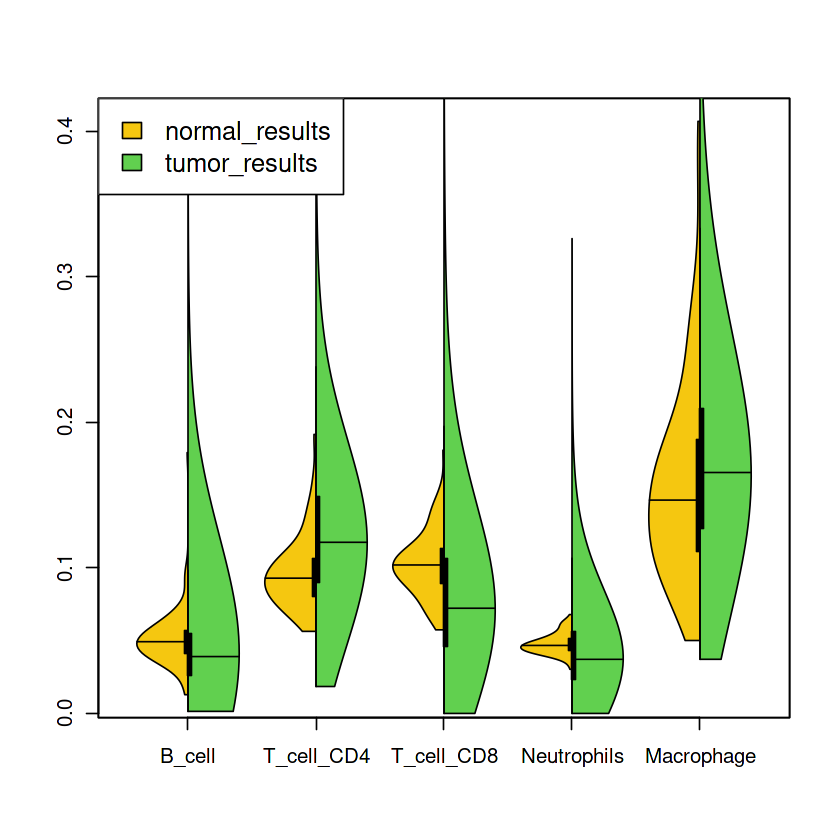

In [89]:
vioplot(normal_results, side = "left", plotCentre = "line", col = 7,)
vioplot(tumor_results, side = "right", plotCentre = "line", col = 3, add = TRUE)

legend("topleft", legend = c("normal_results", "tumor_results"), fill = c(7, 3), cex = 1.25)

## cibersort模型评估

In [94]:
cibersort_normal <- read.csv('/home/shiyu/data/BRCA/deconv/cibersort_normal.txt',row.names=2)
cibersort_tumor <- read.csv('/home/shiyu/data/BRCA/deconv/cibersort_tumor.txt',row.names=2)

head(cibersort_normal,2)
dim(cibersort_normal)

,X,B_cells_naive_CIBERSORT,B_cells_memory_CIBERSORT,Plasma_cells_CIBERSORT,T_cells_CD8_CIBERSORT,T_cells_CD4_naive_CIBERSORT,T_cells_CD4_memory_resting_CIBERSORT,T_cells_CD4_memory_activated_CIBERSORT,T_cells_follicular_helper_CIBERSORT,T_cells_regulatory_.Tregs._CIBERSORT,⋯,Macrophages_M2_CIBERSORT,Dendritic_cells_resting_CIBERSORT,Dendritic_cells_activated_CIBERSORT,Mast_cells_resting_CIBERSORT,Mast_cells_activated_CIBERSORT,Eosinophils_CIBERSORT,Neutrophils_CIBERSORT,P.value_CIBERSORT,Correlation_CIBERSORT,RMSE_CIBERSORT
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,1,0.09773225,0,0.15610871,0.17125480,0,0.06590141,0,0.02105819,0.03573135,⋯,0.1457013,0.02204932,0,0,0.02719215,0,0,0.005,0.3281939,0.955020
TCGA.E2.A1IG.11A.22R.A144.07,2,0.07600922,0,0.05986929,0.09875788,0,0.13218245,0,0.03413997,0.00000000,⋯,0.1731232,0.01061552,0,0,0.11574405,0,0,0.035,0.1743223,1.022437


[1] 113  26

### 计算RMSE的均值

In [102]:
mean(cibersort_normal$RMSE_CIBERSORT)
mean(cibersort_tumor$RMSE_CIBERSORT)

[1] 0.9973678

[1] 1.005485

In [104]:
#计算P值的平均
mean(cibersort_normal$P.value_CIBERSORT)
mean(cibersort_tumor$P.value_CIBERSORT)

[1] 0.04477876

[1] 0.03562387

### 比较normal 和cancer的RMSE

In [119]:
library(sm)

df_normal <- cibersort_normal['RMSE_CIBERSORT']
head(df_normal,2)

df_tumor <- cibersort_tumor['RMSE_CIBERSORT']
head(df_tumor,2)

,RMSE_CIBERSORT
,<dbl>
TCGA.E2.A1L7.11A.33R.A144.07,0.955020
TCGA.E2.A1IG.11A.22R.A144.07,1.022437


,RMSE_CIBERSORT
,<dbl>
TCGA.E2.A1L7.01A.11R.A144.07,1.0606635
TCGA.AR.A0U0.01A.11R.A109.07,0.9957063


In [120]:
# Append column using Tibble:
df_normal <- df_normal %>%
  add_column(Add_Column = "normal")
head(df_normal,2)

df_tumor <- df_tumor %>%
  add_column(Add_Column = "tumor")
head(df_tumor,2)

,RMSE_CIBERSORT,Add_Column
,<dbl>,<chr>
TCGA.E2.A1L7.11A.33R.A144.07,0.955020,normal
TCGA.E2.A1IG.11A.22R.A144.07,1.022437,normal


,RMSE_CIBERSORT,Add_Column
,<dbl>,<chr>
TCGA.E2.A1L7.01A.11R.A144.07,1.0606635,tumor
TCGA.AR.A0U0.01A.11R.A109.07,0.9957063,tumor


In [123]:
new <- rbind(df_normal,df_tumor)
head(new,2)
dim(new)

,RMSE_CIBERSORT,Add_Column
,<dbl>,<chr>
TCGA.E2.A1L7.11A.33R.A144.07,0.955020,normal
TCGA.E2.A1IG.11A.22R.A144.07,1.022437,normal


[1] 1219    2

Warning message in cbind(X, group):
“number of rows of result is not a multiple of vector length (arg 2)”


ERROR: Error in as.graphicsAnnot(legend): 缺少参数"legend",也没有缺省值


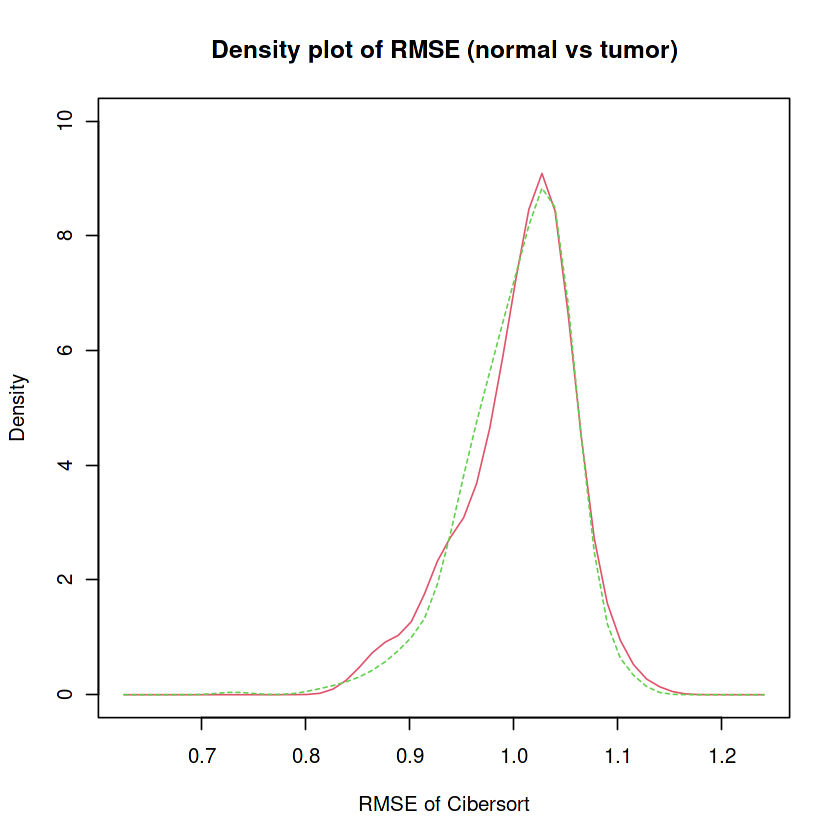

In [128]:
group <- new$Add_Column
labels <- c("normal", "tumor")
value <- new$RMSE_CIBERSORT

# plot densities
sm.density.compare(value, labels, xlab="RMSE of Cibersort")
title(main="Density plot of RMSE (normal vs tumor)")

# add legend via mouse click
colfill<-c(2:(2+length(levels(labels))))
legend(locator(1), levels(labels), fill=colfill)

### 火山图

In [27]:
DE_normal <- read.csv('/home/shiyu/data/BRCA/DE/marker_genes_normal.csv',row.names=1)
DE_tumor <- read.csv('/home/shiyu/data/BRCA/DE/marker_genes_tumor.csv',row.names=1)

head(DE_normal,2)
dim(DE_normal)
dim(DE_tumor)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
ENSG00000177201.2,0.0001981175,1.116725,0.388,0.094,1,Macrophage,ENSG00000177201.2
ENSG00000231426.7,0.0002650756,-41.904760,0.776,0.906,1,Macrophage,ENSG00000231426.7


[1] 502   7

[1] 388   7

In [28]:
library(dplyr) 
library(naniar)
library(magrittr)

DE_normal <- DE_normal %>% replace_with_na(replace = list(avg_log2FC = '-Inf'))
DE_tumor <- DE_tumor %>% replace_with_na(replace = list(avg_log2FC = '-Inf'))

In [29]:
DE_normal <- na.omit(DE_normal)  
DE_tumor <- na.omit(DE_tumor)

dim(DE_normal) 
dim(DE_tumor)

[1] 492   7

[1] 366   7

In [36]:
DE_normal <- DE_normal[,1:5]

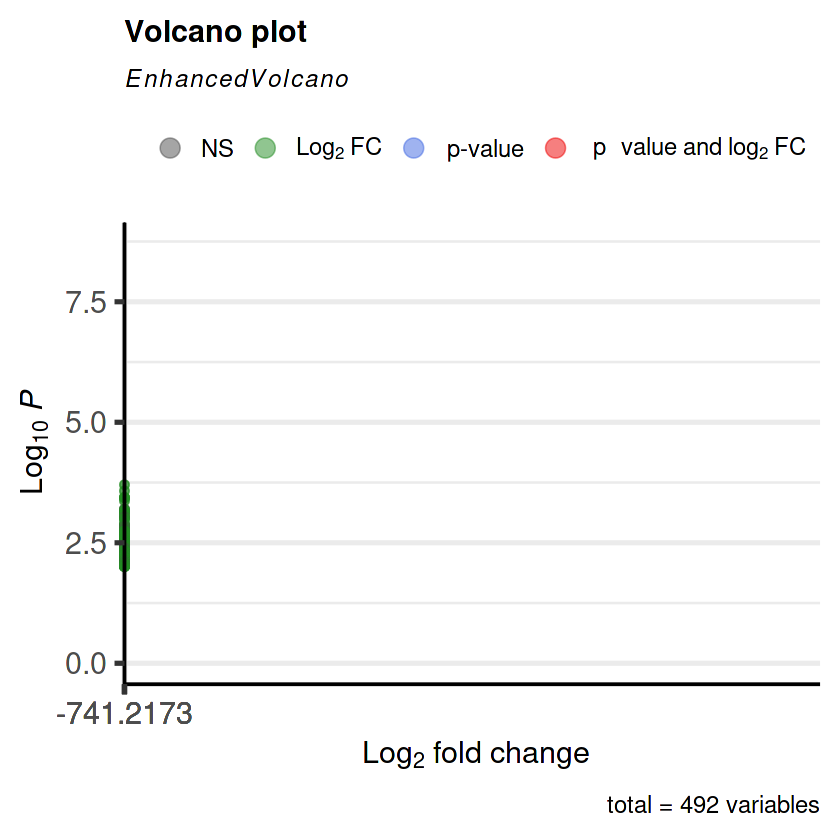

In [37]:
library(EnhancedVolcano)#制作火山图

EnhancedVolcano(DE_normal,
                lab = rownames(DE_normal),
                x = 'avg_log2FC',
                y = 'p_val')

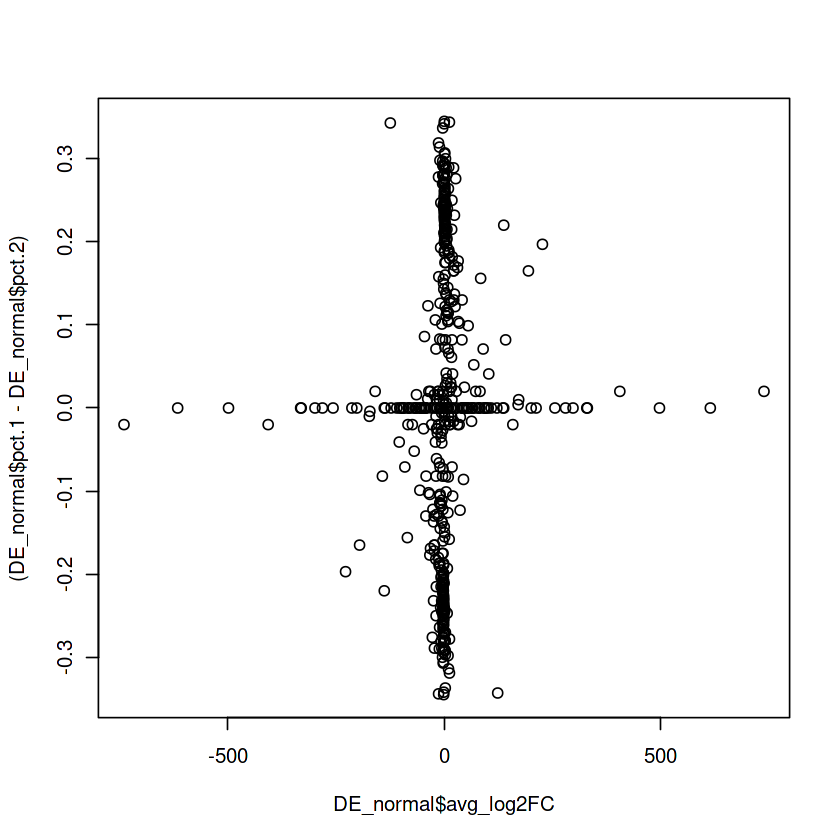

In [38]:
plot(DE_normal$avg_log2FC,(DE_normal$pct.1 - DE_normal$pct.2))
#横轴为log2FC纵轴为表达该基因细胞所占的百分比的散点图